# Udacity Investigate a Dataset

The project is part of the [Data Analysis Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002) provided by Udacity. Within this project I will analyze the [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic). The dataset provides data from 891 passengers of the titanic. Within the analysis I will pose some questions about the dataset. I will try to descriptively and thorougly answer these questions. 

## Import Libraries

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

## Read Dataset

In [3]:
titanic_df = pd.read_csv('data/titanic_dataset.csv')

## Glimpse into Dataset

In [4]:
titanic_df.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanic_df.shape

(891, 12)

Each row in the dataset represents a passenger. In total there are 891 rows and 12 columns. 

In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Overall there are 3 datatypes within the dataframe: int64, object, and float64. For this analysis I am particularly interested in the following features: **Survived**, **Pclass**, **Sex**, **Parch**, **Age**, and **SibSp**. A full description of the variables can be found on [Kaggle](https://www.kaggle.com/c/titanic/data). My dependent variable throughout the analysis will be **Survival**. The other features serve as independent variables.

## Questions

For every catastrophe the most important questions concern the **passengers**. Who were they? Who did survive, who did not? Was a specific group especialy lucky? The passengers on board the titanic could book rooms in three different **classes** (1st, 2nd, 3rd). Passengers in the third class might have been at a disadvantage because they were located deep whitin the titanic:

![Titanic classes](http://img07.deviantart.net/af19/i/2014/307/c/f/r_m_s__titanic_class_system_by_monroegerman-d787jna.png "http://img07.deviantart.net/af19/i/2014/307/c/f/r_m_s__titanic_class_system_by_monroegerman-d787jna.png")

(1) It might be that fewer of these passengers survived than of first class passengers. My first question therefore would be: **What was the difference in survival rates among the passengers of the three classes?**

(2) A classic routine in catastrophies is **women and children first**. Could it be that more women survived than men? Even though women might had the advantage of a first serve it is not to say that they had to look for their children. My second question therefore is: **Did more women survive the catastrophe and were women without children and parents at an advantage?**. For this question I only have the feature **patch** which includes parents and children. That is why I have to include parents in the analysis.

(3) Many catastrophies are accompanied by a hectic atmosphere. People fight for their lives and try everything to get to the last liveboat. Everyone knows that the Titanic did not have enough liveboats. I am wondering if the young and healthy passengers could easier escape death than the elderly and frail because they fought themselves into the liveboats? What about the siblings of these people? It might again be that people with spouses and siblings had to look for their loved ones and were at a disadvantage? Or might it be that people with siblings and spouses could better support themselves in the ice-cold water? Therefore, my third question will be: **What was the difference in survival rates among the young and the elderly relative to their number of siblings and spouses?**

I will try to answer these questions one by one and try to integrate other features when necessary. 

## What was the difference in survival rates among the passengers of the three classes?

In [7]:
grouped_classes = titanic_df.groupby('Pclass')
grouped_classes['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Overall 136 first class passengers, 87 second class passengers, and 119 third class passengers survived. It seems as though passengers from the third class were more likely to survive. We have not calcuated the survival rate relative to the number of passengers, though.

In [43]:
grouped_classes_count_sum = grouped_classes['Survived'].agg(['sum', 'count'])
print(grouped_classes_count_sum)
class_survivors = grouped_classes_count_sum['sum'] / grouped_classes_count_sum ['count']
class_survivors

        sum  count
Pclass            
1       136    216
2        87    184
3       119    491


Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

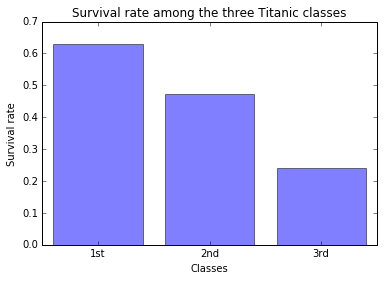

In [63]:
y_pos = np.arange(len(class_survivors))
plt.bar(y_pos, class_survivors, align='center', alpha = 0.5)
plt.xticks(y_pos, ('1st', '2nd', '3rd'))
plt.ylabel('Survival rate')
plt.xlabel('Classes')
plt.title('Survival rate among the three Titanic classes')

When we calcuate the survival rate relative to the number of passengers of each class, a different pattern emerges. Only 24% of the third-class passengers survived. The passengers in the first class were most likely to survive (63%), whereas second class passengers had a survival rate of about 50%.

## Did more women survive the catastrophe and were women without children and parents at an advantage?

## Ideen

* http://stackoverflow.com/questions/27225636/how-to-create-mosaic-plot-from-pandas-dataframe-with-statsmodels-library
* https://www.kaggle.com/benhamner/titanic/exploratory-analysis-in-r/output